# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [1]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

Отправлено боту дополнительным файлом

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

![alternative text](image.jpg)

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

**Ответ:** Как было сделано в прошлых ноутбуках, если обучающая выборка очень большая, то требуется много вычислений(те проходится по всем входным данным долго), то можно заменить на стахостический градиентный спуск, те разделим на батчи дата сет, и каждую иттерацию будем делать только из обьектов из этого батча, что сэкономит время на обработку 1 шага. Мы уведичили количество шагов спуска, а также можем посмотреть например на каждый обьект 1 раз.

### Вывод:
На примере простой нейронной сети мы поняли, как работает метод обратного распространения ошибки, те как он делается, а также как обновляются коэффиценты модели.
Также видно, как функция активации влияет на обучение модели. Заметим также, что модели могут включать больше нейронов и предсказание будет точнее, чем в линейной регрессии.

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [3]:
def Round(x):
    return round(x * 10 ** 5) / 10 ** 5

In [4]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=2), # 1 слой
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1)  # 2 слой
)
model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [5]:
sample_size = int(1e6)
train_x = sps.norm.rvs(size=(sample_size, 1))
train_y = np.tanh(train_x).reshape(-1, 1)
train_x = torch.tensor(train_x, dtype=torch.float32).view(sample_size, 1)
train_y = torch.tensor(train_y, dtype=torch.float32).view(sample_size, 1)

test_x = sps.norm.rvs(size=(sample_size, 1))
test_y = np.tanh(test_x).reshape(-1, 1)
test_x = torch.tensor(test_x, dtype=torch.float32).view(sample_size, 1)
test_y = torch.tensor(test_y, dtype=torch.float32).view(sample_size, 1)

assert train_y.shape == (sample_size, 1)
assert test_y.shape == (sample_size, 1)

Обучите нейросеть на этих данных. Используйте код с занятия.

Iteration 0,	Train Loss: 0.74419
Iteration 500,	Train Loss: 0.19523
Iteration 1000,	Train Loss: 0.03143
Iteration 1500,	Train Loss: 0.00633


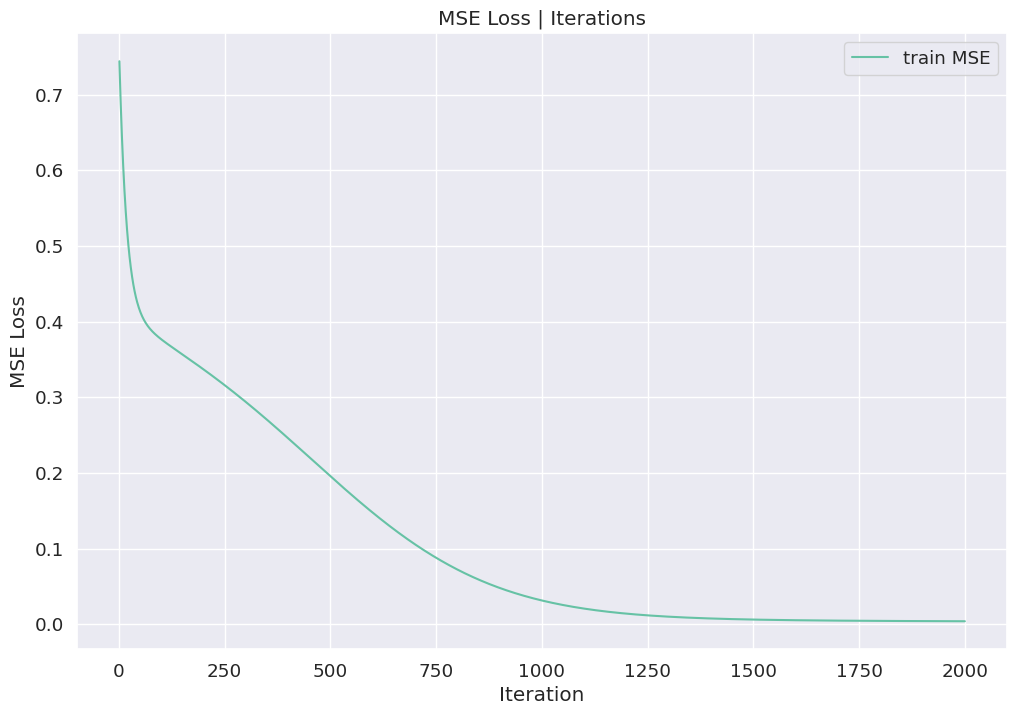

In [6]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()
num_iter = 2000
train_loss = []
for i in range(num_iter):
    y_pred = model(train_x)
    loss = optim_func(y_pred, train_y)
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()

    train_loss.append(loss.item())

    if i % 500 == 0:
        print(f"Iteration {i},\tTrain Loss: {Round(loss.item())}")

plt.figure(figsize=(12, 8))
plt.plot(range(1, num_iter + 1), train_loss, label = "train MSE")
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('MSE Loss | Iterations')
plt.legend()
plt.show()

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

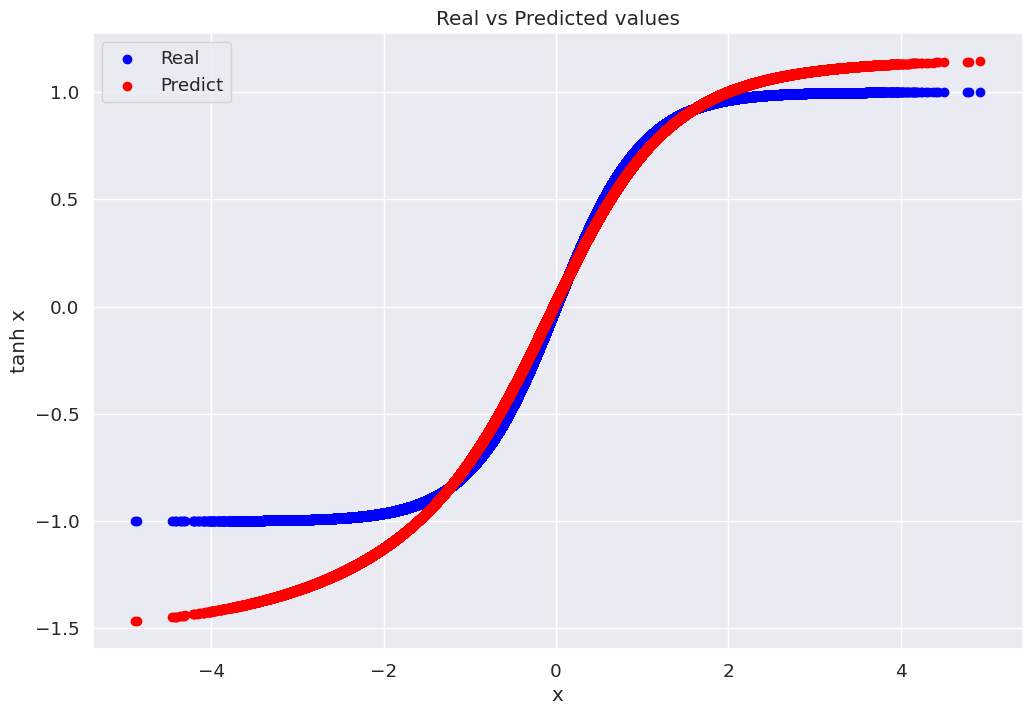

In [7]:
predict = model(test_x)
torch_predict = predict.detach().numpy()
test_x_cp = test_x.numpy()
test_y_cp = test_y.numpy()
plt.figure(figsize=(12, 8))
plt.scatter(test_x_cp, test_y_cp, color = 'blue', label='Real')
plt.scatter(test_x_cp, torch_predict, color='red', label='Predict')
plt.xlabel('x')
plt.ylabel('tanh x')
plt.title('Real vs Predicted values')
plt.legend()
plt.show()

In [8]:
print(f'MSE on test {Round(np.mean(np.square(test_y_cp - torch_predict)))}')

MSE on test 0.00413


**Вывод:** \
Была построена простейщая модель, которая приближает нелинейную функцию $tanh$, из графика на тестовой выборке можно увидеть, что приближение на отрезке $[-\pi,\pi]$ получилось достаточно хорошим и значения находятся в эпсилон окрестности при $x \rightarrow 0$\
Хорошие предсказания около 0 получились, наверное, по причине того, что тренировочные данные находились около 0.\
Но все-таки модель почти идеально попала в график $tanh$ и при x ~ 2.\
MSE также получился достаточно маленький, что может говорить о высокой точности представленной модели, таким образом по входу x, мы можем предсказать значение нелинейной функции, что от нас и требовалось.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [9]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))
class MyModel:
    def __init__(self):
        self.w1 = np.random.rand(2)
        self.b1 = np.random.rand(2)
        self.w2 = np.random.rand(2)
        self.b2 = np.random.rand()     
    def step(self, x):
        ls1 = sigmoid(x.item() * self.w1[0] + self.b1[0])
        ls2 = sigmoid(x.item() * self.w1[1] + self.b1[1])
        return ls1 * self.w2[0] + ls2 * self.w2[1] + self.b2
    def predict(self, X):
        return np.array([self.step(x) for x in X])
    def grad(self, x, y):
        y_p = self.predict(x)
        u = sigmoid(x[:, None] * self.w1 + self.b1)
        dlt = 2 / x.shape[0] * (y_p - y)
        self.dw2 = np.dot(dlt, u)
        self.db2 = np.sum(dlt)
        du = self.db2 * self.w2
        dudw1 = x[:, None] * u * (1 - u)
        dudb1 = u * (1 - u)
        self.dw1 = np.sum(dudw1 * dlt[:, np.newaxis], axis=0) * self.w2
        self.db1 = np.sum(dudb1 * dlt[:, np.newaxis], axis=0) * self.w2
    def iteration(self, x, y, lr):
        self.grad(x, y)
        self.w1-= lr * self.dw1
        self.b1-= lr * self.db1
        self.w2-= lr * self.dw2
        self.b2-= lr * self.db2
    def fit(self, x, y, bc_size=1024, lr=0.005):
        id = np.random.permutation(len(x))
        x_hlp = x[id]
        y_hlp = y[id]
        for i in range(0, len(x_hlp), bc_size):
            x_t = x_hlp[i:i+bc_size]
            y_t = y_hlp[i:i+bc_size]
            x_t = x_t.detach().numpy().flatten()
            y_t = y_t.detach().numpy().flatten()
            self.iteration(x_t, y_t, lr)

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

In [10]:
def MSE(y_true, y_pred):
    y_true = np.reshape(y_true, y_pred.shape)
    return np.mean(np.square(y_true - y_pred))

Waves 0, train mse: 2.02053, test mse: 0.03075
Waves 1, train mse: 0.03074, test mse: 0.00282
Waves 2, train mse: 0.00281, test mse: 0.00215
Waves 3, train mse: 0.00214, test mse: 0.00172


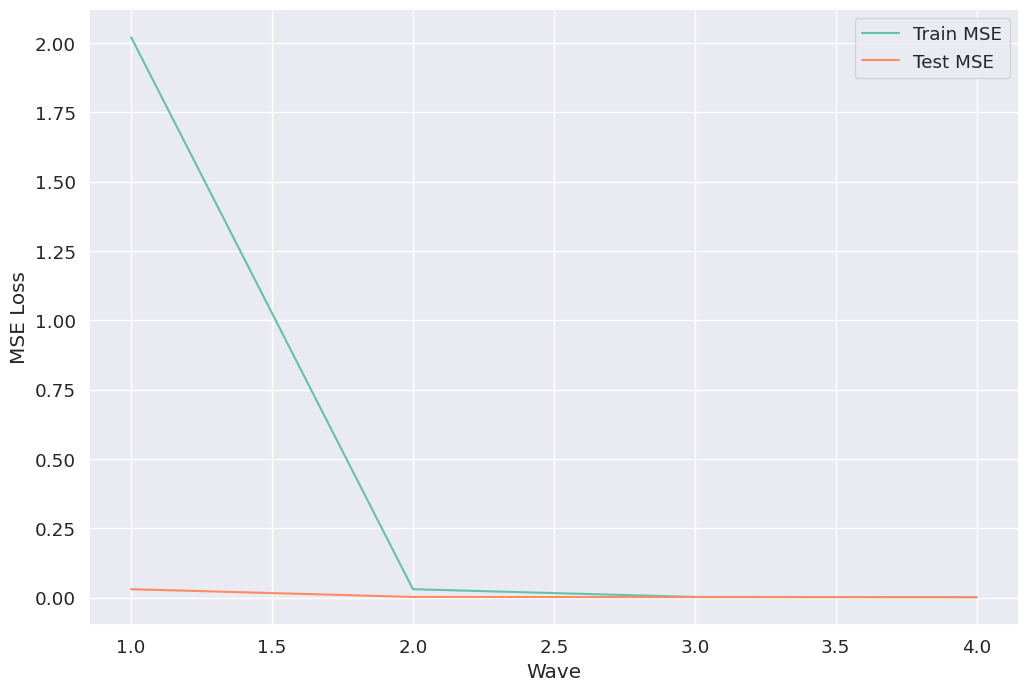

In [11]:
my_model = MyModel()
num_iter = 4
train_ls = []
test_ls = []
for i in range(num_iter):
    y_p = my_model.predict(train_x)
    train_l = MSE(y_p, train_y.numpy())
    train_ls.append(train_l.item())
    my_model.fit(train_x, train_y, bс_size=1024, lr=0.01)
    y_p_t = my_model.predict(test_x)
    test_l = MSE(y_p_t, test_y.numpy())
    test_ls.append(test_l.item())
    print(f"Waves {i}, train mse: {Round(train_l.item())}, test mse: {Round(test_l.item())}")
plt.figure(figsize=(12, 8))
plt.plot(range(1, num_iter + 1), train_ls, label='Train MSE')
plt.plot(range(1, num_iter + 1), test_ls, label='Test MSE')
plt.xlabel('Wave')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [12]:
lr = LinearRegression()
lr.fit(train_x, train_y)
Round(MSE(lr.predict(train_x), train_y.numpy()))

0.02725

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

In [13]:
my_model_pr = my_model.predict(test_x)
lr_pr = lr.predict(test_x)
torch_pr= model(test_x)

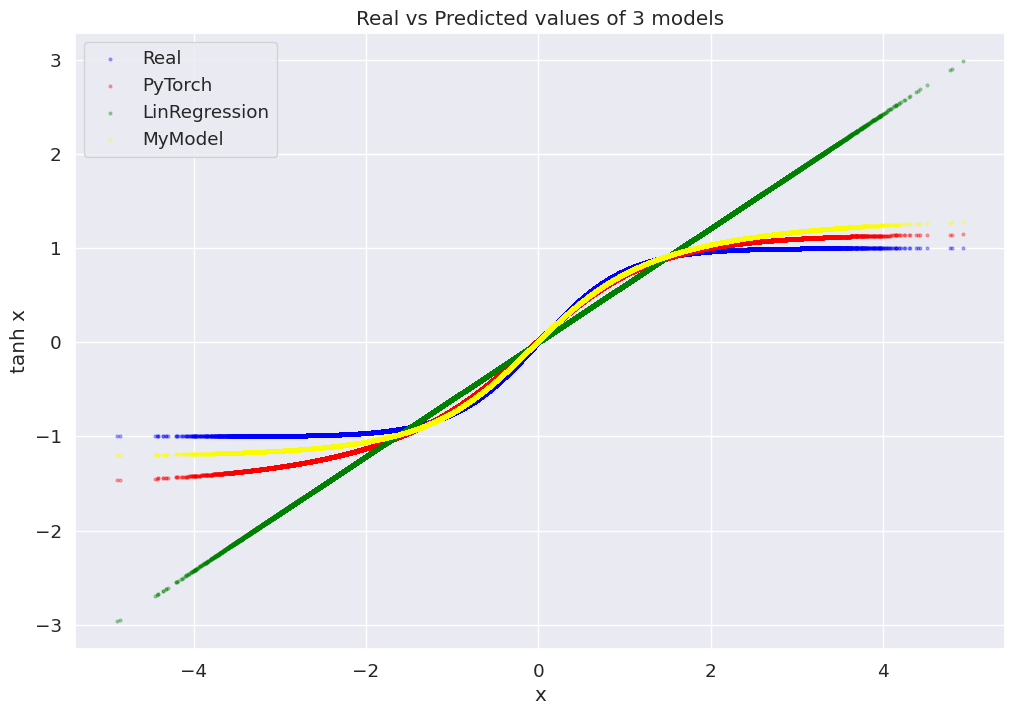

In [14]:
torch_pr = torch_pr.detach().numpy()
plt.figure(figsize=(12, 8))
plt.scatter(test_x_cp, test_y_cp, color = 'blue', label='Real', alpha=0.3, s = 4)
plt.scatter(test_x_cp, torch_pr, color='red', label='PyTorch', alpha=0.3, s = 4)
plt.scatter(test_x_cp, lr_pr, color='green', label='LinRegression', alpha=0.3, s = 4)
plt.scatter(test_x_cp, my_model_pr, color='yellow', label='MyModel', alpha=0.3, s = 4)
plt.xlabel('x')
plt.ylabel('tanh x')
plt.title('Real vs Predicted values of 3 models')
plt.legend()
plt.show()

In [15]:
print(f'PyTorch MSE: {Round(MSE(test_y.numpy(), torch_pr))}')
print(f'MyModel MSE: {Round(MSE(test_y.numpy(), my_model_pr))}')
print(f'LinearRegression MSE: {Round(MSE(test_y.numpy(), lr_pr))}')

PyTorch MSE: 0.00413
MyModel MSE: 0.00172
LinearRegression MSE: 0.0274


Повторите вычисления для другой нелинейной функции $y(x)$.

## Создадим дата сет для функции $sin$

In [16]:
sample_size = int(1e6)
train_x = sps.norm.rvs(size=(sample_size, 1))
train_y = np.sin(train_x).reshape(-1, 1)
train_x = torch.tensor(train_x, dtype=torch.float32).view(sample_size, 1)
train_y = torch.tensor(train_y, dtype=torch.float32).view(sample_size, 1)

test_x = sps.norm.rvs(size=(sample_size, 1))
test_y = np.sin(test_x).reshape(-1, 1)
test_x = torch.tensor(test_x, dtype=torch.float32).view(sample_size, 1)
test_y = torch.tensor(test_y, dtype=torch.float32).view(sample_size, 1)

assert train_y.shape == (sample_size, 1)
assert test_y.shape == (sample_size, 1)

## Обучаем LinearRegression

In [17]:
lr = LinearRegression()
lr.fit(train_x, train_y)
Round(MSE(lr.predict(train_x), train_y.numpy()))

0.06409

## Обучаем PyTorch

In [18]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=2), # 1 слой
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1)  # 2 слой
)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()
num_iter = 2000
train_loss = []
for i in range(num_iter):
    y_pred = model(train_x)
    loss = optim_func(y_pred, train_y)
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()

    train_loss.append(loss.item())

    if i % 500 == 0:
        print(f"Iteration {i},\tTrain Loss: {Round(loss.item())}")

Iteration 0,	Train Loss: 0.55948
Iteration 500,	Train Loss: 0.19175
Iteration 1000,	Train Loss: 0.04787
Iteration 1500,	Train Loss: 0.01673


## Обучаем MyModel

In [19]:
my_model = MyModel()
num_iter = 5
train_ls = []
test_ls = []

for i in range(num_iter):
    y_p = my_model.predict(train_x)
    train_l = MSE(y_p, train_y.numpy())
    train_ls.append(train_l.item())
    my_model.fit(train_x, train_y, bc_size=1024, lr=0.01)

    y_p_t = my_model.predict(test_x)
    test_l = MSE(y_p_t, test_y.numpy())
    test_ls.append(test_l.item())

    print(f"Waves {i}, train mse: {Round(train_l.item())},\ttest mse: {Round(test_l.item())}")

Waves 0, train mse: 2.24629,	test mse: 0.03207
Waves 1, train mse: 0.03194,	test mse: 0.01605
Waves 2, train mse: 0.01579,	test mse: 0.01466
Waves 3, train mse: 0.0144,	test mse: 0.01367
Waves 4, train mse: 0.01343,	test mse: 0.01289


## Визуализация предсказаний на тестовой части данных

In [20]:
my_model_pr = my_model.predict(test_x)
lr_pr = lr.predict(test_x)
torch_pr= model(test_x)

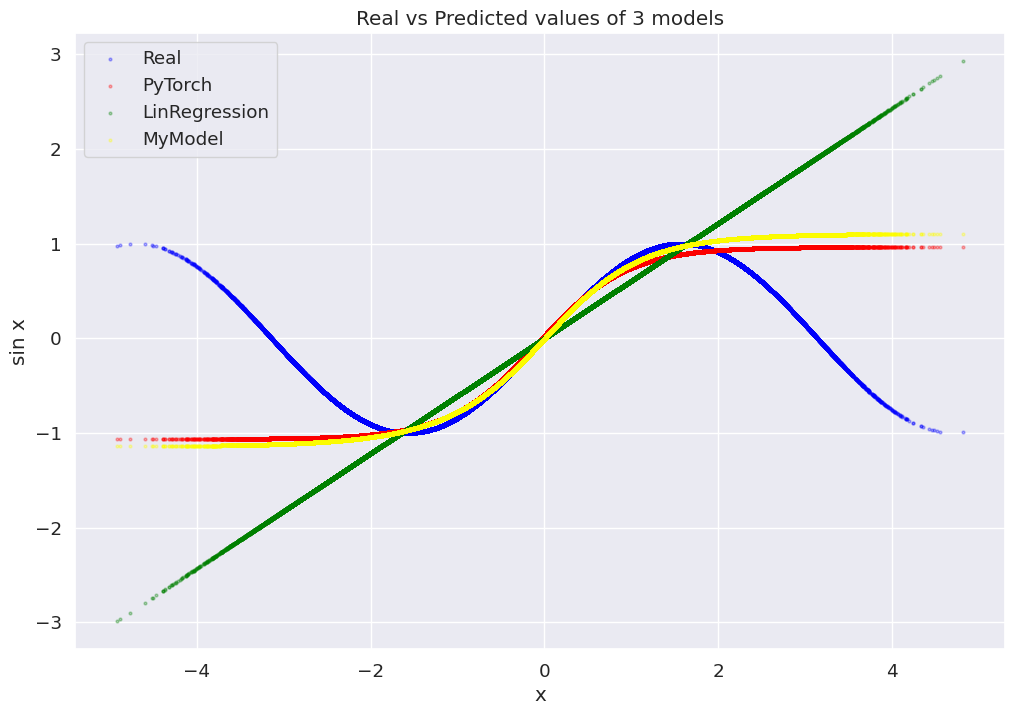

In [22]:
torch_pr = torch_pr.detach().numpy()
test_x = test_x.numpy()
test_y = test_y.numpy()
plt.figure(figsize=(12, 8))
plt.scatter(test_x, test_y, color = 'blue', label='Real', alpha=0.3, s = 4)
plt.scatter(test_x, torch_pr, color='red', label='PyTorch', alpha=0.3, s = 4)
plt.scatter(test_x, lr_pr, color='green', label='LinRegression', alpha=0.3, s = 4)
plt.scatter(test_x, my_model_pr, color='yellow', label='MyModel', alpha=0.3, s = 4)
plt.xlabel('x')
plt.ylabel('sin x')
plt.title('Real vs Predicted values of 3 models')
plt.legend()
plt.show()

In [23]:
print(f'PyTorch MSE: {Round(MSE(test_y, torch_pr))}')
print(f'MyModel MSE: {Round(MSE(test_y, my_model_pr))}')
print(f'LinearRegression MSE: {Round(MSE(test_y, lr_pr))}')

PyTorch MSE: 0.01188
MyModel MSE: 0.01289
LinearRegression MSE: 0.0648


**Вывод:**
1) Написанная мной модель по точности не уступает PyTorch модели
2) Все 3 модели имеют хорошее приближение при $x \rightarrow 0$ как функции $tanh$, так и функции $sin$, это можно увидеть исходя из метрики MSE
3) На концах отрезка $[-\pi;\pi]$ началось расхождение между значениями функции и предсказаниями, это можно обьяснить тем, что больше обучающих Xов собрано у 0\
\
Таким образом мы научились писать простую нейоронную сеть, которая смогла достаточно точно предсказать значение нелинейныъ функций